<a href="https://colab.research.google.com/github/Erickcr-29/18-10-2024/blob/main/CNN_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar píxeles entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# CIFAR-10 tiene 10 clases (0–9), las convertimos a enteros planos
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# 2. Definir etiquetas de las clases
class_names = ['avion','automovil','pajaro','gato','ciervo',
               'perro','rana','caballo','barco','camion']



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

#(batch_size,height,width,3)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


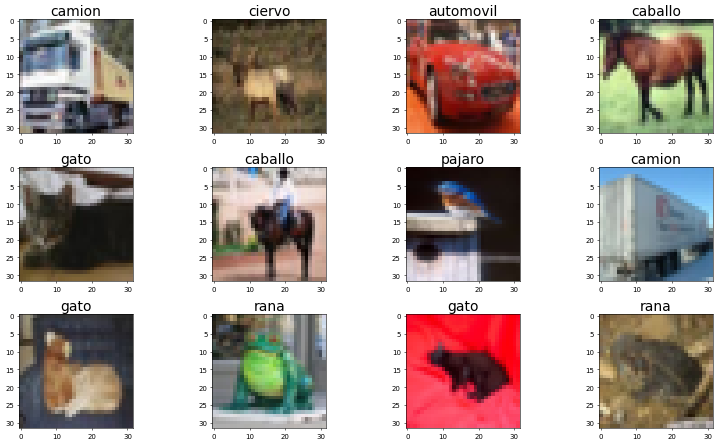

In [ ]:

fig = plt.figure(figsize=(16,9),dpi=50)

for n,_ in enumerate(range(12)):
  ax = fig.add_subplot(3,4,n+1)
  ax.imshow(x_train[2*n+1])
  ax.set_title(class_names[y_train[2*n+1]],fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Conv2D,Conv3D,Conv1D,Dense,Flatten,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


#Conv3D -> Videos clasificacion
#Conv2D -> Imagenes
#Conv1D -> Señales (señales de audio,)

input_1 = Input(shape=(32,32,3))
#filtros,kernel,
#padding same => rellena de ceros para mantener el tamaño de la imagen (32,32,32)
#padding valid => no realiza lo anterior (30,30,32)

# imagen 1 -> fondo blanco px (255,255,255)/255 -> (1,1,1) -> (w1,w2,w3) -> ()
# imagen 2 -> fondo negro px (0,0,0)/255 -> (0,0,0) -> (w1,w2,w3)
x = Conv2D(16,5,padding='same',activation='relu')(input_1)
x = BatchNormalization()(x)
x = MaxPooling2D()(x) #shape=(None, 16, 16, 32),


x = Conv2D(64,3,padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
#activation: 'tanh','relu','selu','linear','elu','sin','

x = Conv2D(128,3,padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x) # shape=(None, 4, 4, 128)


x = Flatten()(x)
x = Dropout(0.5)(x) #dropout nos permite evitar el overfitting y apagar el x*100% de las neuronas
#en entrenamiento
xout = Dense(10,activation='softmax')(x)  # 10 clases para CIFAR-10

model = Model(input_1,xout)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,634 (447.79 KB)

 Trainable params: 114,186 (446.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3784 - loss: 2.2742 - val_accuracy: 0.5989 - val_loss: 1.1550
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5931 - loss: 1.1981 - val_accuracy: 0.6388 - val_loss: 1.0497
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6655 - loss: 0.9626 - val_accuracy: 0.5343 - val_loss: 1.4258
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7021 - loss: 0.8544 - val_accuracy: 0.7339 - val_loss: 0.7740
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7261 - loss: 0.7815 - val_accuracy: 0.7317 - val_loss: 0.7727
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7480 - loss: 0.7234 - val_accuracy: 0.7474 - val_loss: 0.7322
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7652 - loss: 0.6709 - val_accuracy: 0.6271 - val_loss: 1.1702
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7690 - loss: 0.655

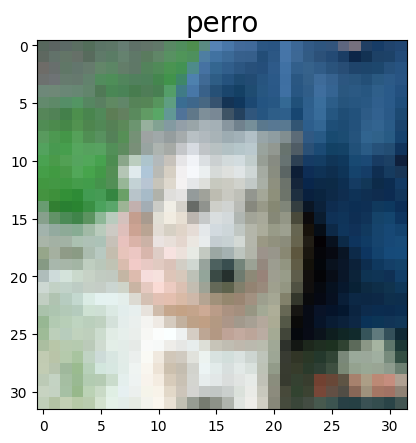

In [ ]:
ind = 444
img = x_test[ind]

fig2 = plt.figure()

ax = fig2.add_subplot(1,1,1)

ax.imshow(img)
ax.set_title(class_names[y_test[ind]],fontsize=20)
plt.show()

In [ ]:
import numpy
#input -> (batch_size,32,32,3)
#para 555 -> ciervo -> modelo dice que es un barco
y_result = model.predict(img.reshape(1,32,32,3)) #(salida son 10 clases, entonces 10 valores de probabilidades)

print("nuestro modelo dice que la imagen es:",class_names[numpy.nanargmax(y_result)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
nuestro modelo dice que la imagen es: perro




```
# CNN - Encoders
```



In [ ]:
from tensorflow.keras.layers import Reshape,Conv2DTranspose

input_1 = Input(shape=(32,32,3))

x = Conv2D(16,7,padding='same',activation='relu',strides=2)(input_1)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(32,3,padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(64,3,padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(128,3,padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Flatten()(x) # (None,128)

x = Reshape((1,1,128))(x)

x = Conv2DTranspose(128,3,strides=2,padding='same',activation='relu')(x) # shape=(None, 2, 2, 128)
x = Conv2DTranspose(64,3,strides=2,padding='same',activation='relu')(x) # shape=(None, 2, 2, 128)
x = Conv2DTranspose(32,3,strides=2,padding='same',activation='relu')(x) # shape=(None, 2, 2, 128)
x = Conv2DTranspose(16,3,strides=2,padding='same',activation='relu')(x) # shape=(None, 2, 2, 128)
xout = Conv2DTranspose(3,3,strides=2,padding='same',activation='relu')(x) # shape=(None, 2, 2, 128)

model_encoder_decoder = Model(input_1,xout)
model_encoder_decoder.compile(optimizer=Adam(learning_rate=0.001),
              loss='mae', #Median Absolute error -> l1
              metrics=['mae'])

#mae =  |y_true-y_pred| = 0.5
#mse =  |y_true-y_pred|**2 -> (0.25)

#fft loss -> fft(imagen) -> [f1,f2,f3,....,fn]
#fft loss pred -> fft(imagen_reconstruida) -> [f1p,f2p,f3p,....,fnp]
# fft loss = |fft loss real - fft loss pred|**2

model_encoder_decoder.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 16, 16, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 16, 16, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_20             │ (None, 2, 2, 128)      │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 4, 4, 64)       │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_22             │ (None, 8, 8, 32)       │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_23             │ (None, 16, 16, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_24             │ (None, 32, 32, 3)      │           435 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 345,219 (1.32 MB)

 Trainable params: 344,739 (1.32 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
model_encoder_decoder.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 0.1498 - mae: 0.1498 - val_loss: 0.1342 - val_mae: 0.1342
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1043 - mae: 0.1043 - val_loss: 0.0928 - val_mae: 0.0928
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0933 - mae: 0.0933 - val_loss: 0.0882 - val_mae: 0.0882
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0890 - mae: 0.0890 - val_loss: 0.0850 - val_mae: 0.0850
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0858 - mae: 0.0858 - val_loss: 0.0849 - val_mae: 0.0849
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0835 - mae: 0.0835 - val_loss: 0.0793 - val_mae: 0.0793
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0808 - mae: 0.0808 - val_loss: 0.0761 - val_mae: 0.0761
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0793 - mae: 0.0793 - val_loss: 0.0735 - val_mae: 0.0735
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt: 

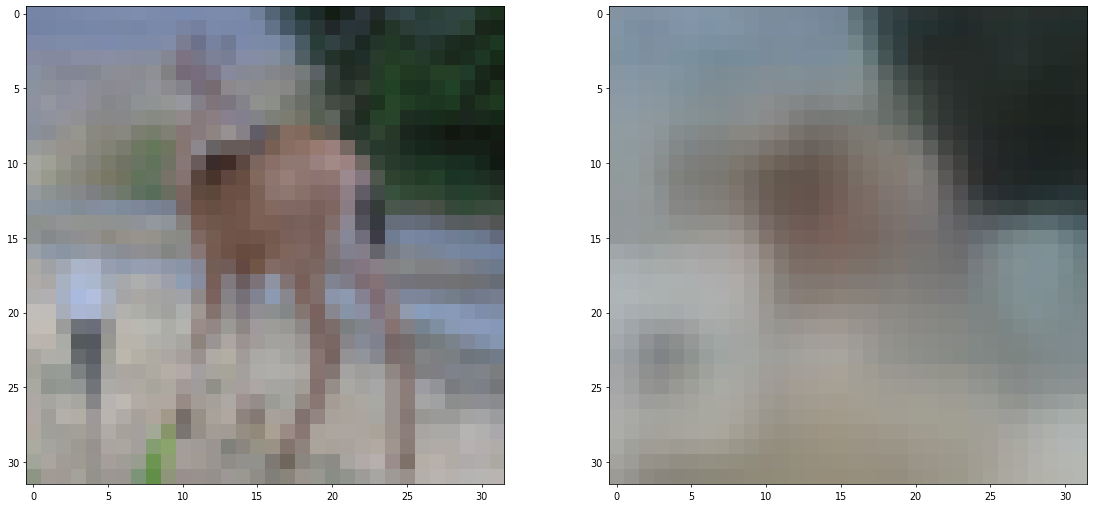

In [ ]:
ind = 100

img = x_test[ind]

predict = model_encoder_decoder(img.reshape((1,32,32,3)))[0]

fig3 = plt.figure(figsize=(20,9),dpi=69)

ax1 = fig3.add_subplot(1,2,1)
ax2 = fig3.add_subplot(1,2,2)

ax1.imshow(img)
ax2.imshow(predict)

plt.show()

